In [37]:
import pandas as pd
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [38]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [39]:
# Get statistics on the dataset.
training_df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [40]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean squared error at each epoch.
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [41]:
# Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against 200 random training examples."""
    
    # Label the axes.
    plt.xlabel(feature)
    plt.ylabel(label)

    # Create a scatter plot from 200 random points of the dataset.
    random_examples = training_df.sample(n=200)
    plt.scatter(random_examples[feature], random_examples[label])

    # Create a red line representing the model. The red line starts
    # at coordinates (x0, y0) and ends at coordinates (x1, y1).
    x0 = 0
    y0 = trained_bias
    x1 = 10000
    y1 = trained_bias + (trained_weight * x1)
    x = np.array([x0, x1])
    y = np.array([float(y0), float(y1)])
    plt.plot(x.squeeze(), y.squeeze(), c='r')

    # Render the scatter plot and the red line.
    plt.show()



def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()


print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Epoch 1/30
567/567 [==============================] - 1s 2ms/step - loss: 598341.0625 - root_mean_squared_error: 773.5251
Epoch 2/30
567/567 [==============================] - 1s 2ms/step - loss: 29521.4688 - root_mean_squared_error: 171.8181
Epoch 3/30
567/567 [==============================] - 1s 2ms/step - loss: 27680.7402 - root_mean_squared_error: 166.3753
Epoch 4/30
567/567 [==============================] - 1s 2ms/step - loss: 26408.6211 - root_mean_squared_error: 162.5073
Epoch 5/30
567/567 [==============================] - 1s 2ms/step - loss: 24719.0352 - root_mean_squared_error: 157.2229
Epoch 6/30
567/567 [==============================] - 2s 3ms/step - loss: 23905.0840 - root_mean_squared_error: 154.6127
Epoch 7/30
567/567 [==============================] - 1s 2ms/step - loss: 22576.9492 - root_mean_squared_error: 150.2563
Epoch 8/30
567/567 [==============================] - 1s 2ms/step - loss: 21509.3555 - root_mean_squared_error: 146.6607
Epoch 9/30
567/567 [===========

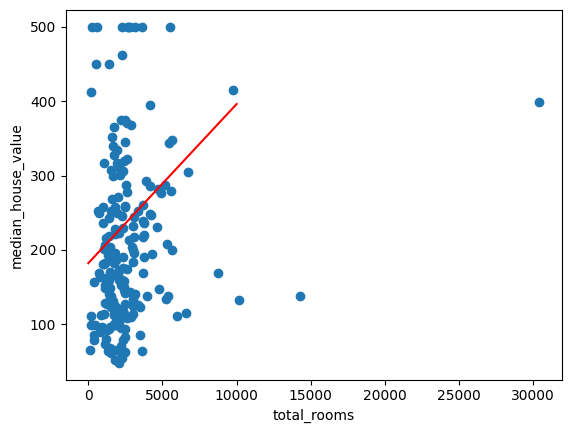

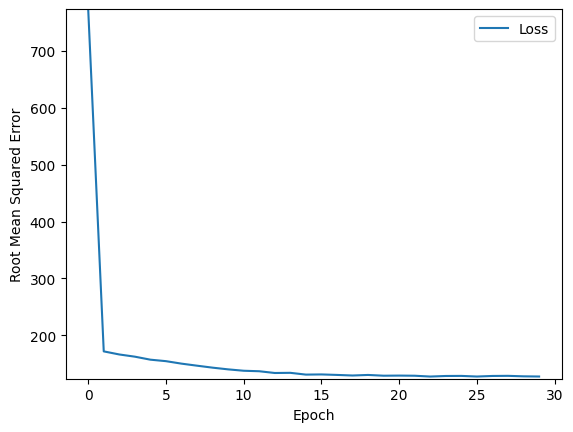

In [43]:
# The following variables are the hyperparameters.
learning_rate = 0.03
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [57]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

In [56]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 3518    169             224
 2465    184             255
 3159    161             261
10665    160             229
  961    275             234
15502    261             303
 3167     86             253
 3619    168             237
 2994    184             211
 4214    180             256


Epoch 1/12
284/284 [==============================] - 1s 2ms/step - loss: 40563.6562 - root_mean_squared_error: 201.4042
Epoch 2/12
284/284 [==============================] - 0s 2ms/step - loss: 37598.7031 - root_mean_squared_error: 193.9039
Epoch 3/12
284/284 [==============================] - 1s 2ms/step - loss: 33361.7422 - root_mean_squared_error: 182.6520
Epoch 4/12
284/284 [==============================] - 0s 2ms/step - loss: 31643.6699 - root_mean_squared_error: 177.8867
Epoch 5/12
284/284 [==============================] - 0s 2ms/step - loss: 28942.4941 - root_mean_squared_error: 170.1249
Epoch 6/12
284/284 [==============================] - 0s 2ms/step - loss: 27094.6992 - root_mean_squared_error: 164.6047
Epoch 7/12
284/284 [==============================] - 0s 2ms/step - loss: 26713.7148 - root_mean_squared_error: 163.4433
Epoch 8/12
284/284 [==============================] - 0s 2ms/step - loss: 24684.1953 - root_mean_squared_error: 157.1120
Epoch 9/12
284/284 [============

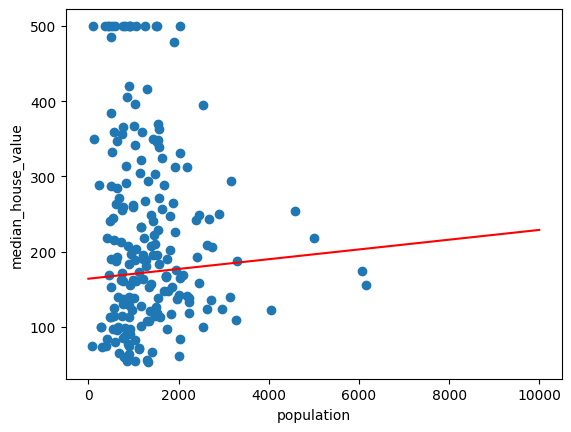

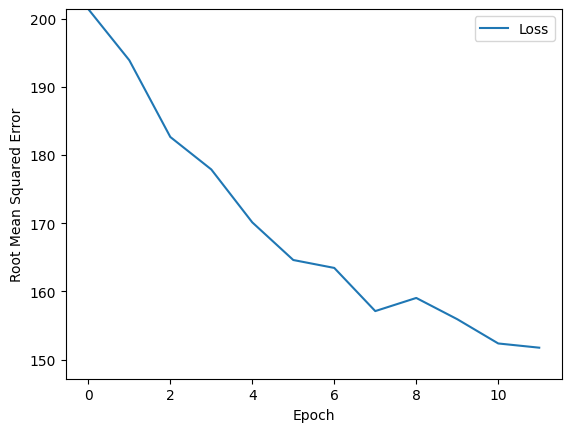

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             172
 1867     92             176
 2191     69             178
 1052     62             171
 1647     80             175
 2312    295             179
 1604    500             174
 1066    342             171
  338    118             166
 1604    128             174
 1200    187             172
  292     80             166
 2014    112             177
 1817     95             176
 1328     69             172


In [69]:
my_feature = "population"   # Replace the ? with population or possibly
                   # a different column name.

# Experiment with the hyperparameters.
learning_rate = 0.1
epochs = 12
batch_size = 60

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)

Epoch 1/24
567/567 [==============================] - 1s 2ms/step - loss: 38663.5508 - root_mean_squared_error: 196.6305
Epoch 2/24
567/567 [==============================] - 1s 2ms/step - loss: 19145.4102 - root_mean_squared_error: 138.3669
Epoch 3/24
567/567 [==============================] - 1s 2ms/step - loss: 14988.2461 - root_mean_squared_error: 122.4265
Epoch 4/24
567/567 [==============================] - 1s 2ms/step - loss: 14829.5303 - root_mean_squared_error: 121.7766
Epoch 5/24
567/567 [==============================] - 1s 2ms/step - loss: 14600.7246 - root_mean_squared_error: 120.8335
Epoch 6/24
567/567 [==============================] - 1s 2ms/step - loss: 14400.4004 - root_mean_squared_error: 120.0017
Epoch 7/24
567/567 [==============================] - 1s 2ms/step - loss: 14282.3604 - root_mean_squared_error: 119.5088
Epoch 8/24
567/567 [==============================] - 1s 2ms/step - loss: 14141.7520 - root_mean_squared_error: 118.9191
Epoch 9/24
567/567 [============

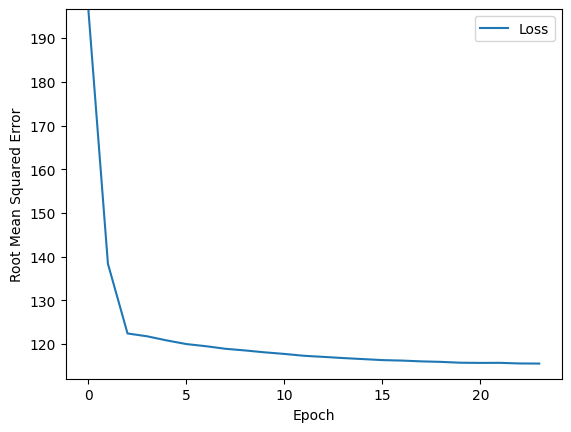

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             188
    2     92             200
    2     69             194
    2     62             210
    1     80             186
    2    295             224
    2    500             209
    2    342             222
    4    118             285
    2    128             213
    2    187             223
    3     80             233
    2    112             223
    2     95             218
    2     69             209


In [70]:
#@title Double-click to view a possible solution to Task 4.

# Define a synthetic feature
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]
my_feature = "rooms_per_person"

# Tune the hyperparameters.
learning_rate = 0.06
epochs = 24
batch_size = 30

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, mae = train_model(my_model, training_df,
                                        my_feature, my_label,
                                        epochs, batch_size)

plot_the_loss_curve(epochs, mae)
predict_house_values(15, my_feature, my_label)


In [71]:
# Generate a correlation matrix.
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0
